=== DataFrame Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None

=== Descriptive Statistics ===
          instant      season    

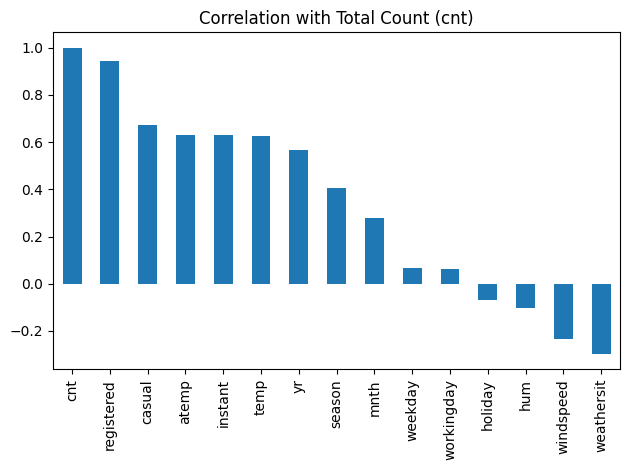


=== Monthly Average Rentals ===
mnth
1     2176.338710
2     2655.298246
3     3692.258065
4     4484.900000
5     5349.774194
6     5772.366667
7     5563.677419
8     5664.419355
9     5766.516667
10    5199.225806
11    4247.183333
12    3403.806452
Name: cnt, dtype: float64


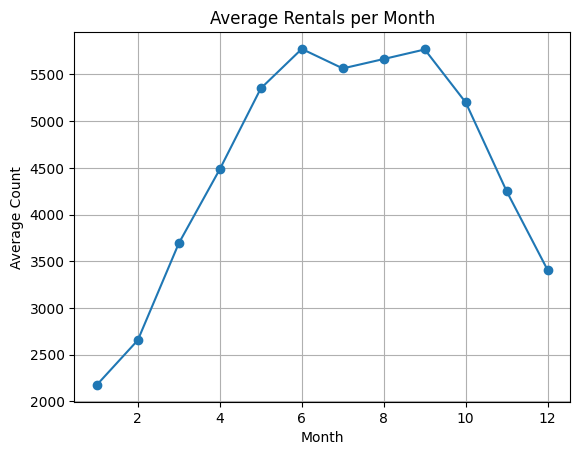


=== Average Rentals by Weekday ===
weekday
0    4228.828571
1    4338.123810
2    4510.663462
3    4548.538462
4    4667.259615
5    4690.288462
6    4550.542857
Name: cnt, dtype: float64


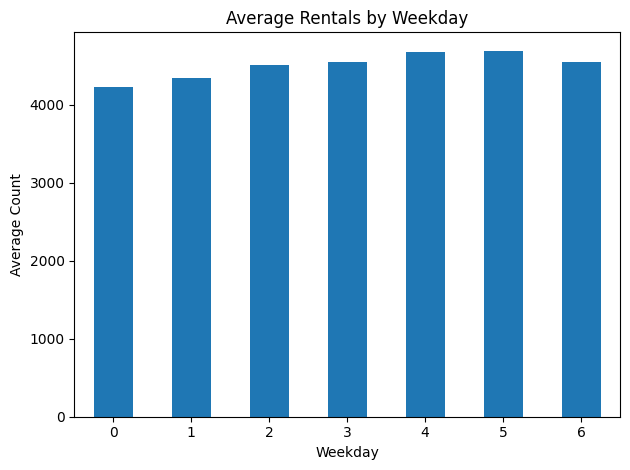


=== Average Rentals: Working Day vs Non-Working Day ===
workingday
0    4330.168831
1    4584.820000
Name: cnt, dtype: float64


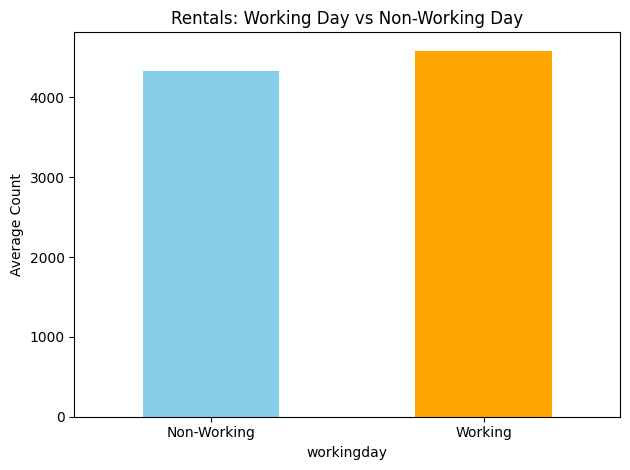


=== Plot: Temperature vs Bike Rentals ===


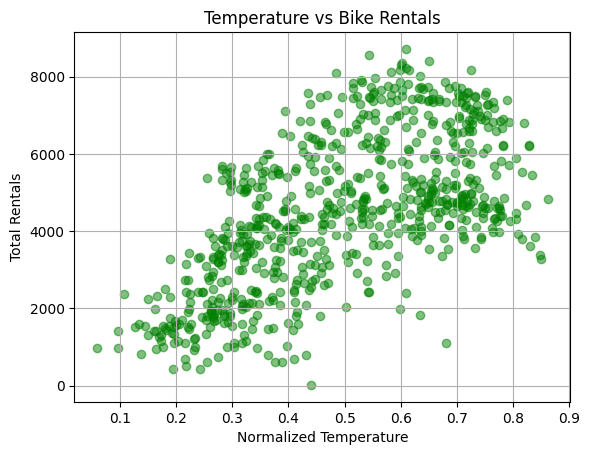


=== Outlier Days (Rentals > Mean + 2*STD) — Threshold: 8376.12 ===
         dteday   cnt
623  2012-09-15  8714
630  2012-09-22  8395
637  2012-09-29  8555


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('day.csv')

print("=== DataFrame Info ===")
print(df.info())

print("\n=== Descriptive Statistics ===")
print(df.describe())

print("\n=== Missing Values in Each Column ===")
print(df.isnull().sum())

print("\n=== Correlation Matrix ===")
correlation = df.corr(numeric_only=True)
print(correlation)

print("\n=== Plot: Correlation with 'cnt' (Total Rentals) ===")
correlation['cnt'].sort_values(ascending=False).plot(kind='bar', title='Correlation with Total Count (cnt)')
plt.tight_layout()
plt.show()

print("\n=== Monthly Average Rentals ===")
monthly_avg = df.groupby('mnth')['cnt'].mean()
print(monthly_avg)
monthly_avg.plot(kind='line', marker='o', title='Average Rentals per Month')
plt.xlabel('Month')
plt.ylabel('Average Count')
plt.grid(True)
plt.show()

print("\n=== Average Rentals by Weekday ===")
weekday_avg = df.groupby('weekday')['cnt'].mean()
print(weekday_avg)
weekday_avg.plot(kind='bar', title='Average Rentals by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Average Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

print("\n=== Average Rentals: Working Day vs Non-Working Day ===")
working_day_avg = df.groupby('workingday')['cnt'].mean()
print(working_day_avg)
working_day_avg.plot(kind='bar', title='Rentals: Working Day vs Non-Working Day', color=['skyblue', 'orange'])
plt.xticks(ticks=[0, 1], labels=['Non-Working', 'Working'], rotation=0)
plt.ylabel('Average Count')
plt.tight_layout()
plt.show()

print("\n=== Plot: Temperature vs Bike Rentals ===")
plt.scatter(df['temp'], df['cnt'], alpha=0.5, c='green')
plt.title('Temperature vs Bike Rentals')
plt.xlabel('Normalized Temperature')
plt.ylabel('Total Rentals')
plt.grid(True)
plt.show()

mean_rentals = np.mean(df['cnt'])
std_rentals = np.std(df['cnt'])
threshold = mean_rentals + 2 * std_rentals
outliers = df[df['cnt'] > threshold]
print(f"\n=== Outlier Days (Rentals > Mean + 2*STD) — Threshold: {threshold:.2f} ===")
print(outliers[['dteday', 'cnt']])
